In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bit_df = pd.read_csv(r'/Users/ilkaymueller/Documents/GitHub/Data_Analysis_Projects/Bitcoin/bitcoin_price_Training - Training.csv')

In [3]:
bit_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
bit_df.shape

(1556, 7)

In [5]:
bit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [6]:
bit_df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [7]:
bit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


<font color= blue, size=15 > Preprocessing </font>

Changing the data type of date from object to datetime

In [8]:
bit_df['Date'] = bit_df['Date'].astype('datetime64[ns]')

In [9]:
bit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB


In [10]:
bit_df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [11]:
bit_df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [12]:
#data timeframe from 2013-04-28 to 2017-07-31

In [13]:
#checking missing values

bit_df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [14]:
#checking duplicates

bit_df.duplicated().sum()

0

In [15]:
#checking the sort

bit_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [16]:
bit_df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [17]:
#trying other way to sort the dates
bit_df.sort_index(ascending=False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [18]:
bit_sorted = bit_df.sort_index(ascending=False).reset_index()
bit_sorted

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [19]:
bit_sorted.drop('index', axis=1, inplace = True)

In [20]:
bit_sorted

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


<font color = blue, size=15> Analyzing the price over time <font>

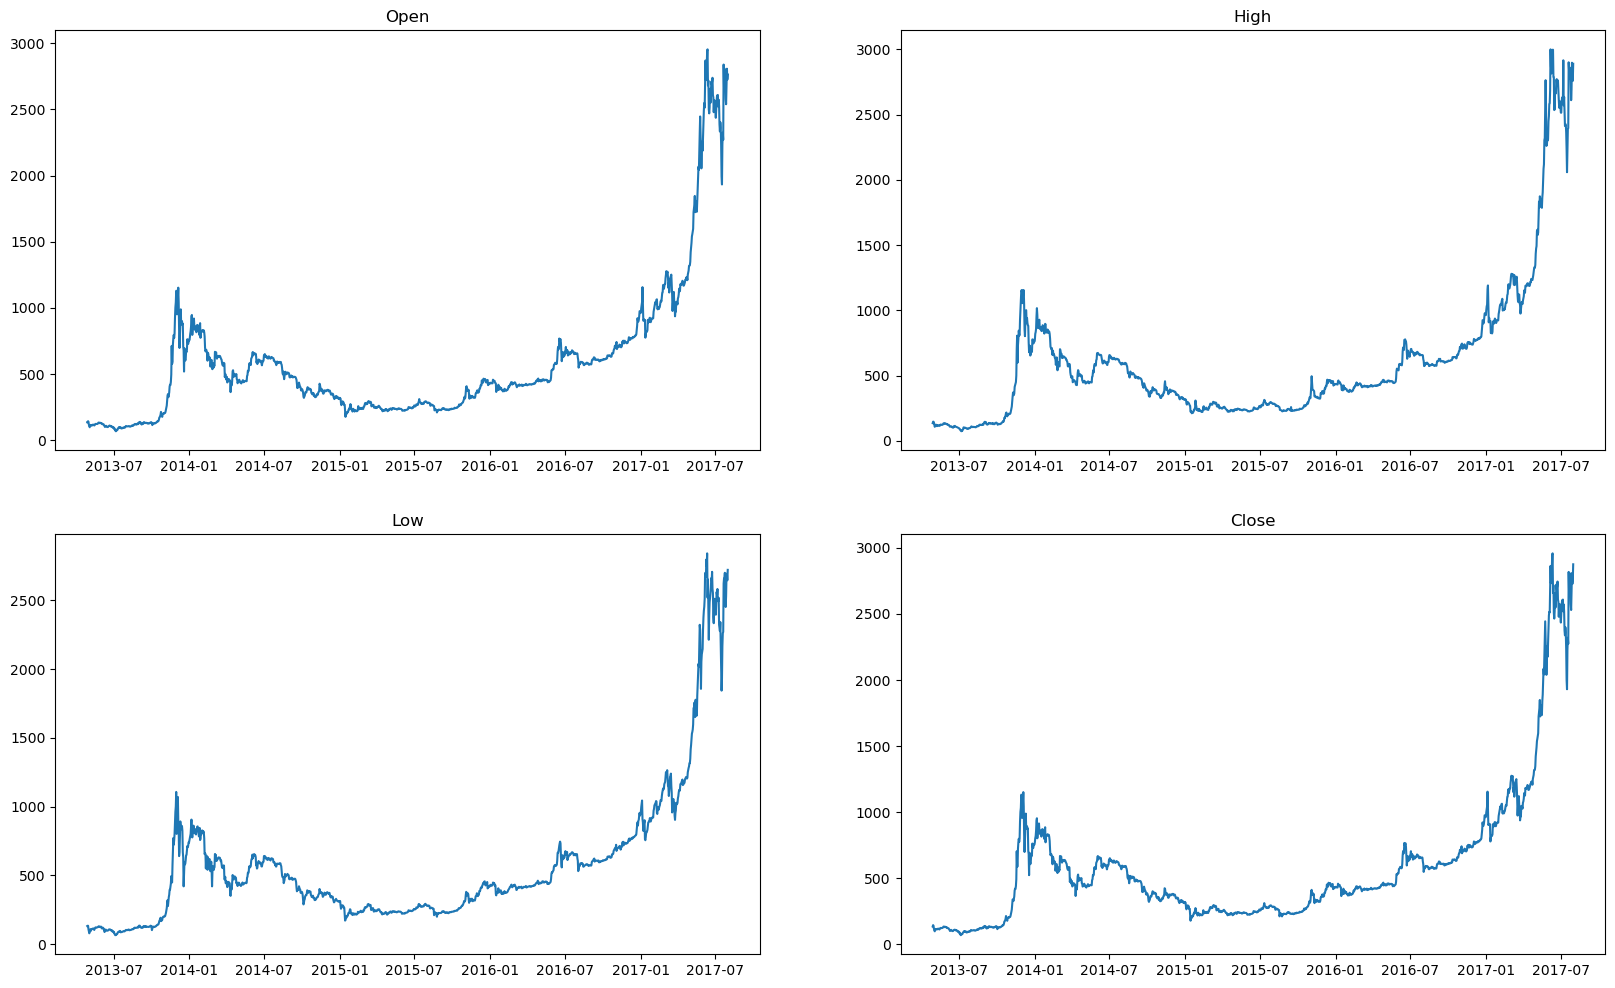

In [21]:
#I will draw the df

plt.figure(figsize=(20,12))

for index,col in enumerate(['Open','High', 'Low','Close'],1):
    plt.subplot(2,2,index)
    plt.plot(bit_sorted['Date'],bit_sorted[col])
    plt.title(col)

In [22]:
bit_sample = bit_sorted[0:50]

In [23]:
#!pip install chart-studio
#!pip install plotly

In [24]:
import chart_studio.plotly as py

import plotly.graph_objs as go

import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [25]:
init_notebook_mode(connected=True)

In [26]:
trace = go.Candlestick(x = bit_sample['Date'],
                       high = bit_sample['High'],
                       open = bit_sample['Open'],
                       low = bit_sample['Low'],
                       close = bit_sample['Close']  
                      )

In [27]:
candle_data = [trace]

layout = {
    'title':'Bitcoin Historical Price' , 
    'xaxis':{'title':'Date'}
}

In [28]:
fig = go.Figure(data = candle_data , layout=layout)

fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

<font color=blue, size= 15 > Analyzing closing price <font>

In [29]:
bit_sorted['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<AxesSubplot:>

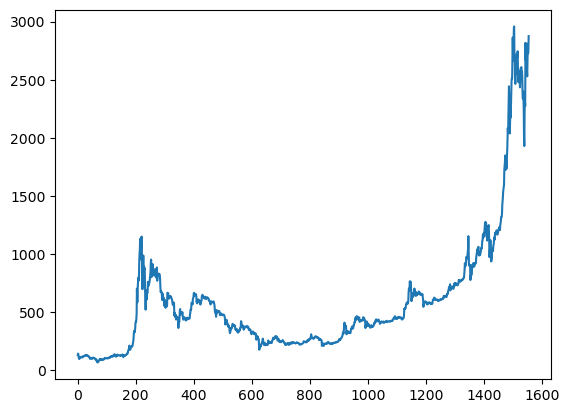

In [30]:
bit_sorted['Close'].plot()

In [31]:
#above one also show over time because I sorted the dates but I also like to see dates
#in the graph, so I will set the date as index

In [32]:
bit_sorted.set_index('Date', inplace=True)

In [33]:
bit_sorted

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<AxesSubplot:xlabel='Date'>

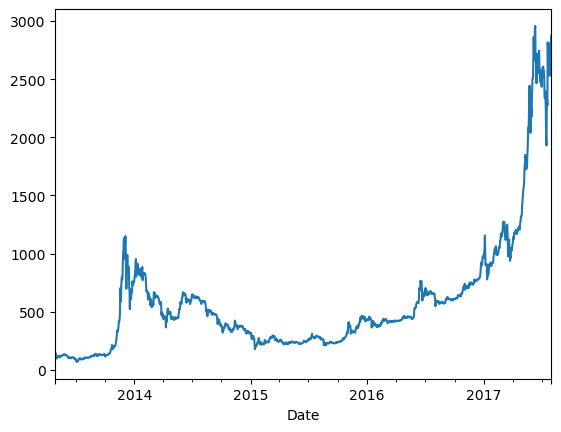

In [34]:
bit_sorted['Close'].plot()

<AxesSubplot:xlabel='Date'>

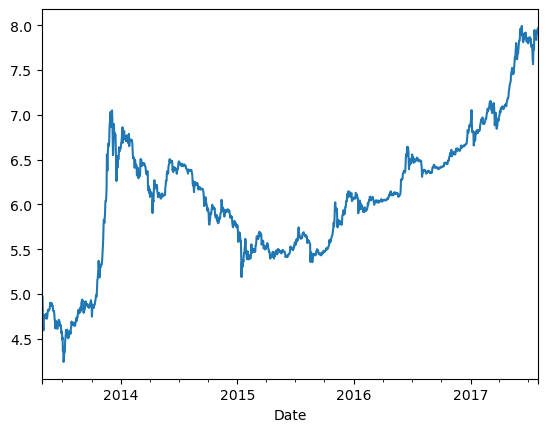

In [35]:
np.log1p(bit_sorted['Close']).plot()

#scaled with log because of large range of values, log will be better to detect trends

Comparing the linear one and log scaled one

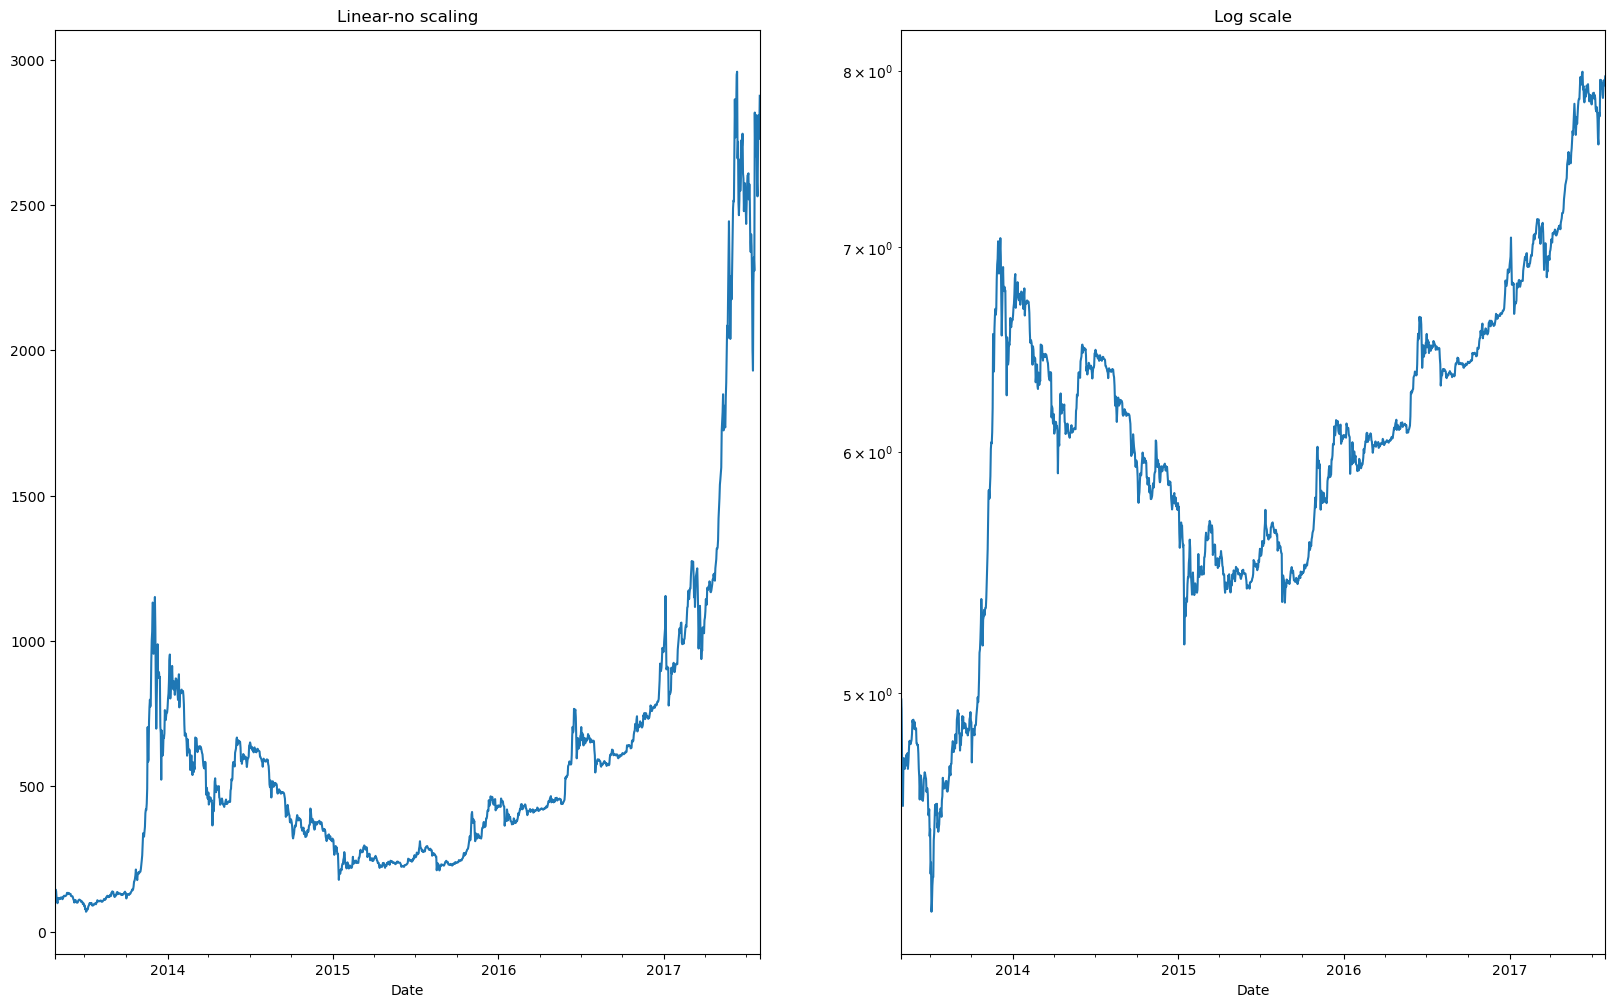

In [36]:
plt.figure(figsize=(20,12))

plt.subplot(1,2,1)
bit_sorted['Close'].plot()
plt.title('Linear-no scaling')

plt.subplot(1,2,2)
np.log1p(bit_sorted['Close']).plot()
plt.title('Log scale')
plt.yscale('log') #to make the values shown in y axis also log

In [37]:
bit_sorted['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

Checking yearly, quarterly, monthly close prices movements

<AxesSubplot:xlabel='Date'>

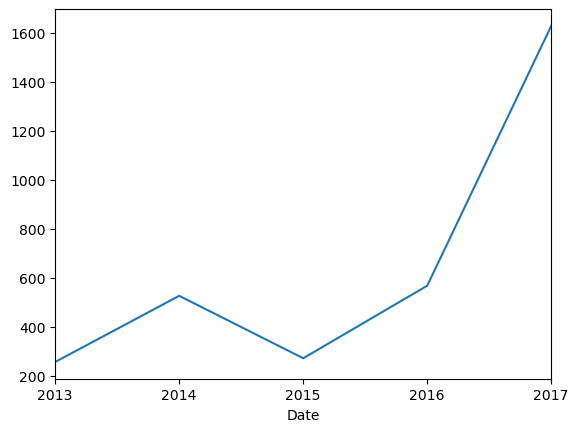

In [38]:
bit_sorted['Close'].resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

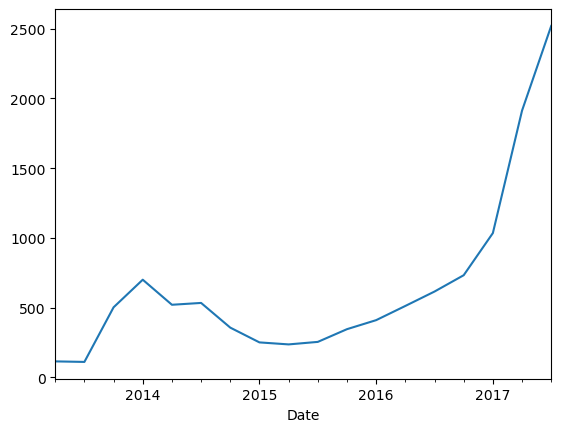

In [39]:
bit_sorted['Close'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

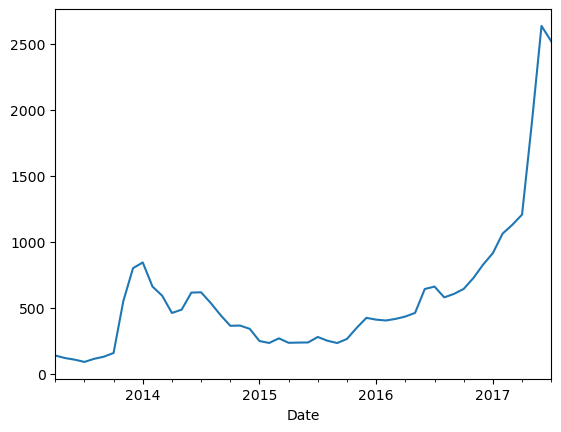

In [40]:
bit_sorted['Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

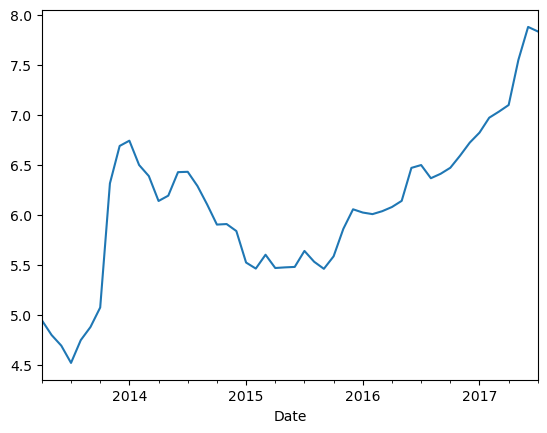

In [41]:
np.log1p(bit_sorted['Close'].resample('M').mean()).plot()

In [42]:
bit_sorted['earning'] = bit_sorted['Close'].pct_change()*100

<AxesSubplot:xlabel='Date'>

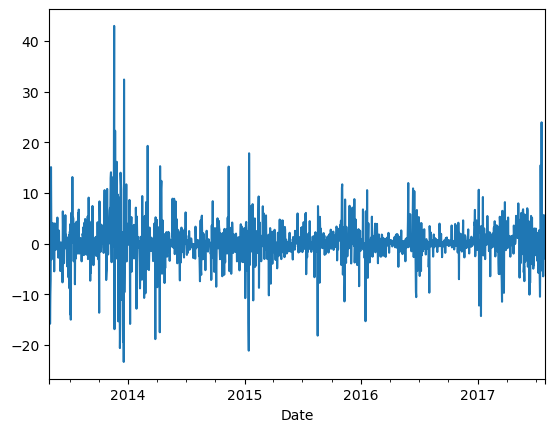

In [45]:
bit_sorted['earning'].plot()

In [46]:
import chart_studio.plotly as py

import plotly.graph_objs as go

import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)

In [47]:
#pip install cufflinks

In [48]:
import cufflinks as cf

In [49]:
cf.go_offline()

In [50]:
bit_sorted['earning']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: earning, Length: 1556, dtype: float64

In [51]:
bit_sorted['earning'].iplot()